In [ ]:
#importing Important libraries

import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Kaggle projects/Email Spam Classifier/spam.csv",encoding="ISO-8859-1")

In [ ]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## **1. Data Cleaning**

In [ ]:
df=data.copy()

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df=df[['v1','v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [ ]:
# encoding Target Variable


from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

# applying on Target Variable

df['Target']=encoder.fit_transform(df['Target'])


# it assigns Spam as 1 and Not Spam as 0

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.duplicated().sum()

403

In [ ]:
# dropping Duplicate values


df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **2. EDA**

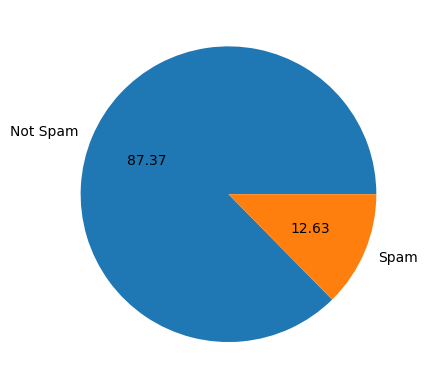

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['Target'].value_counts(),autopct="%.2f",labels=['Not Spam','Spam'])
plt.show()

**It Shows data is Imbalanced**

### **Text Extraction**

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# counting number of characters in a text and creating a separate column for that
df['num_char']=df['Text'].apply(len)

In [ ]:
# counting number of words in a text and store in new column

df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# counting number of Sentences in a text and store in new column

df['num_sent']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# statistical analysis for the data frame

df.describe()

,Target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# individually studying the Spam and Not Spam messages

# Not Spam Messages
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Spam Messages

df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### **Visualizing the distribution**

<Axes: xlabel='num_char', ylabel='Count'>

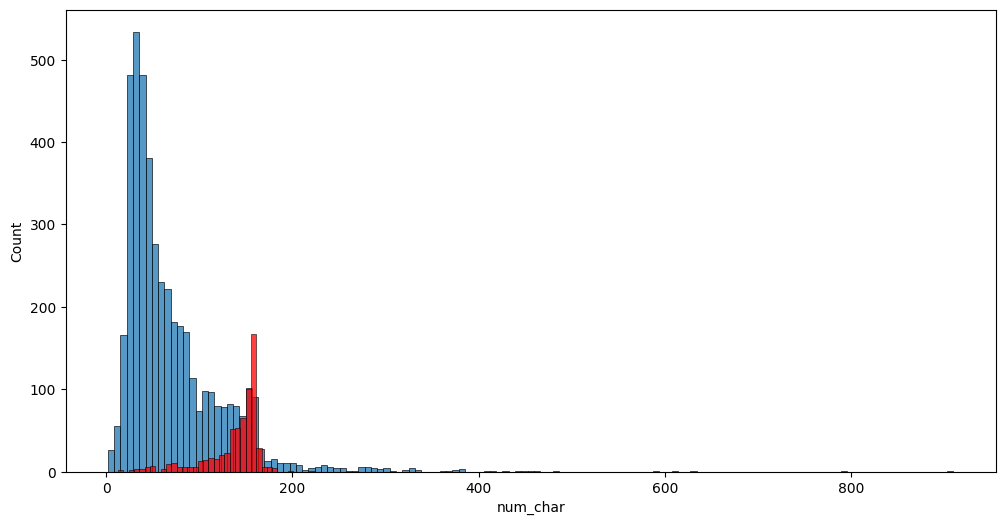

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_char'])
sns.histplot(df[df['Target'] == 1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

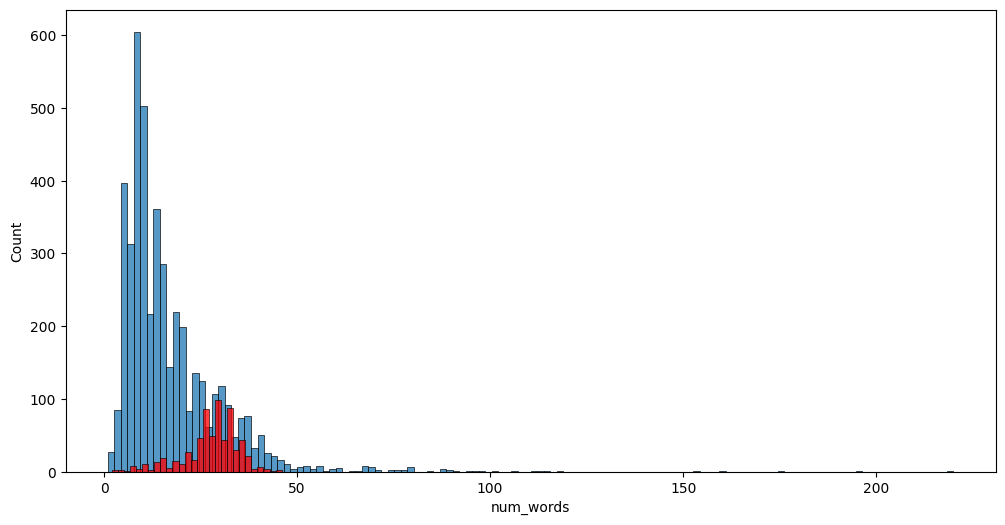

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

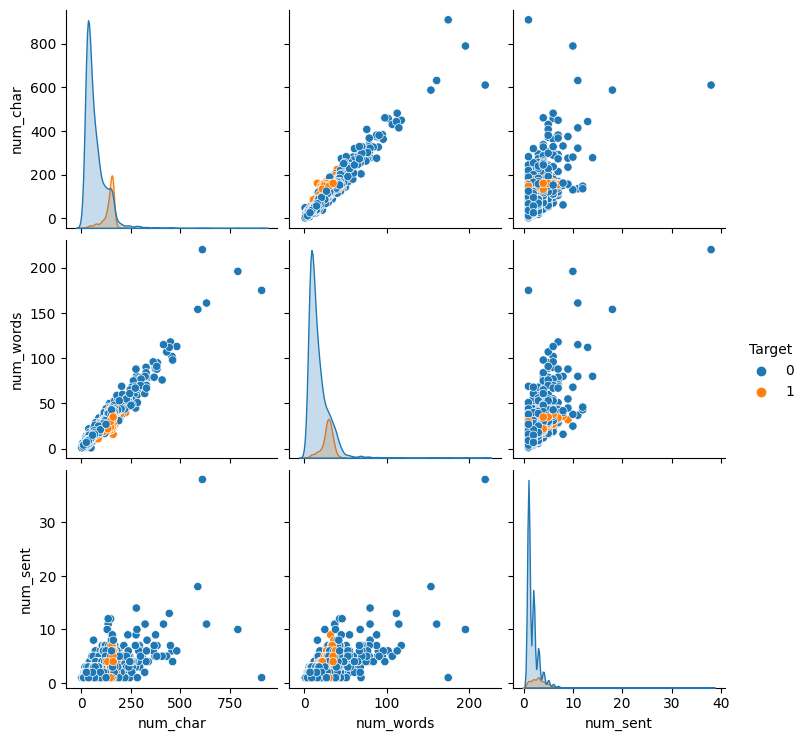

In [ ]:
sns.pairplot(df,hue='Target')

### **Checking Correlation in dataset**

<ipython-input-34-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

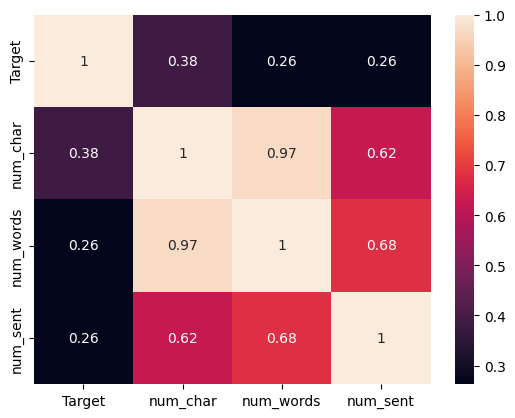

In [ ]:
sns.heatmap(df.corr(),annot=True)

1. num_char is highly correlated with Target columnn
2. all independent column are highly correlated with each others
3. We will consider only one column for further for removing multicollinearity

# **3. Text / Data Preprocessing**

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

**The Text and Data Preprocessing Stage take several steps describe below:**


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming









**1. Lower casing**

In [ ]:
df['transformed_text']=df['Text'].str.lower()
df['transformed_text'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

**2. Tokenization**

In [ ]:
df['transformed_text']=df['transformed_text'].apply(nltk.word_tokenize)
df['transformed_text'][0]

['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

**3. Removing Special Characters**

In [ ]:
df['transformed_text']=df['transformed_text'].apply(lambda x: [i for i in x if i.isalnum()])
df['transformed_text'][0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

**4. Removing stop words and punctuation**

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['transformed_text']=df['transformed_text'].apply(lambda x:[i for i in x if i not in stopwords.words('english') and i not in string.punctuation])

In [ ]:
df['transformed_text'][0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

**5. Stemming**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text']=df['transformed_text'].apply(lambda x: [ps.stem(i) for i in x])
df['transformed_text'][0]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [ ]:
df.head()

,Target,Text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


**Doing All the Process using one Helper Function**

In [ ]:
def transform_text(text):
  #  lowercasing
    text = text.lower()

  # tokenising
    text = nltk.word_tokenize(text)

  # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
  # removing Stopwords
    text = y[:]
    y.clear()
     
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
  # stemming       
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['transformed_text'] = data['v2'].apply(transform_text)

In [ ]:
df.head(5)

,Target,Text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### **Words Cloud view for Most frequent words in each class**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Generating word cloud for Spam messages

spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

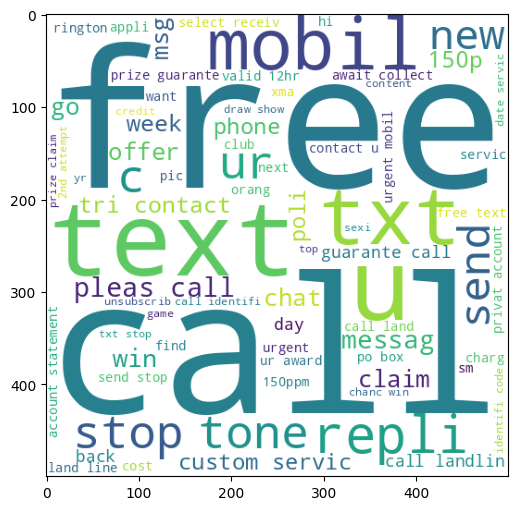

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

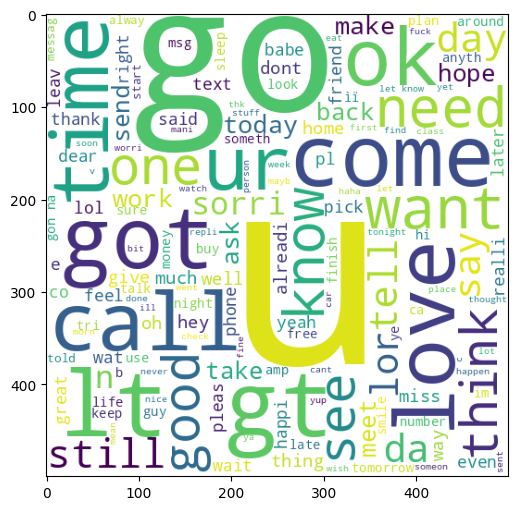

In [ ]:
spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
# corpus for spam messages
spam_corpus=[]
for sent in df[df['Target']==1]['transformed_text'].tolist():
  for word in sent.split(" "):
    spam_corpus.append(word)

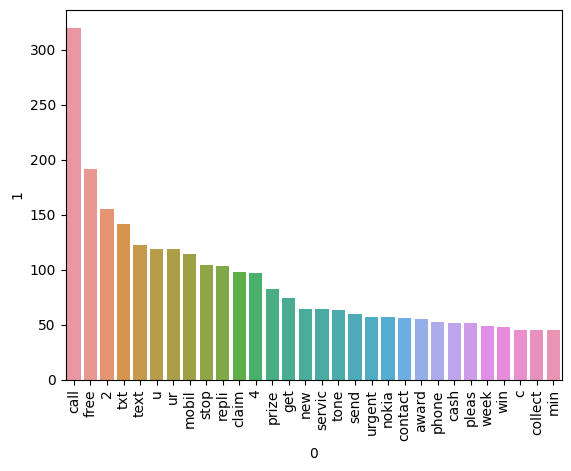

In [ ]:
# Frequency count of top 30 words in Spam Corpus
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Not Spam Corpus
not_spam_corpus=[]
for sent in df[df['Target']==0]['transformed_text'].tolist():
  for word in sent.split(" "):
    not_spam_corpus.append(word)

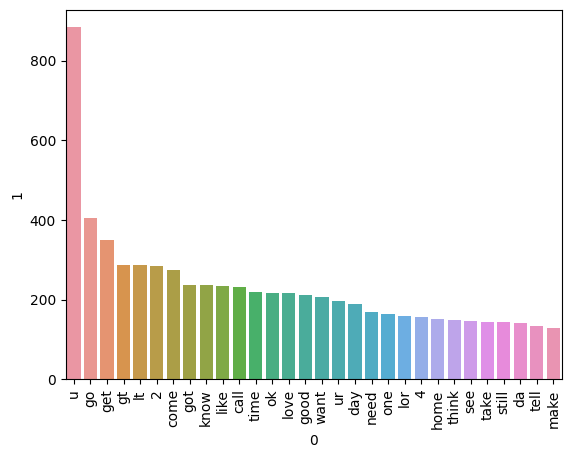

In [ ]:
# Frequency count of top 30 words in Not Spam Corpus
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# **4. Model Building**

In [ ]:
# data frame for model building, Transformed text is Indpependent Variable and Target is dependent variable
df[['transformed_text','Target']]

,transformed_text,Target
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah think goe usf live around though,0
...,...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...,1
5568,b go esplanad fr home,0
5569,piti mood suggest,0
5570,guy bitch act like interest buy someth els nex...,0


### **Using CountVectorizer**

In [ ]:
# tranforming my text data into vectors using count vectorizer or tfidf vectorizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y=df['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# importing Naive Bayes Models

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
# import evaluation metrics

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# fitting Gaussian model with count vectorizer technique

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
# fitting Multinomial model with count vectorizer technique

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
# fitting Bernoulli model with count vectorizer technique

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))



0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### **Using TfIdf technique**

In [ ]:
df[['transformed_text','Target']]

,transformed_text,Target
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah think goe usf live around though,0
...,...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...,1
5568,b go esplanad fr home,0
5569,piti mood suggest,0
5570,guy bitch act like interest buy someth els nex...,0


In [ ]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['Target'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb1=GaussianNB()
mnb1=MultinomialNB()
bnb1=BernoulliNB()

In [ ]:
gnb1.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
# fitting GaussinNB

mnb1.fit(X_train,y_train)
y_pred2=mnb1.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
# fitting Bernoulli NB
bnb1.fit(X_train,y_train)
y_pred3=bnb1.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### **Applying Various Models and storing their Precision and Accuracy**

In [ ]:
# importing diferent model class
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
lr=LogisticRegression()
svc=SVC()
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [ ]:
clf={
    'logistic': lr,
     'SVC': svc ,
     'MultinomialNB':mnb ,
     'KNN': knn ,
     'Decision Tree': dt ,
     'Random Forest' : rf ,
     'XG Boost' : xgb
}

In [ ]:
def func(clf,X_train,y_train,X_test,y_test):
  # train
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision




In [ ]:
func(lr,X_train,y_train,X_test,y_test)

(0.9468085106382979, 0.9882352941176471)

In [ ]:
accuracy=[]
precision=[]
for name,model in clf.items():
  current_acc,current_prec=func(model,X_train,y_train,X_test,y_test)
  accuracy.append(current_acc)
  precision.append(current_prec)
  # accuracy, pression store krna h
  print("For",name,"Accuracy and Precision are: ")
  print("Accuracy: ",current_acc)
  print("Precision: ",current_prec)
  print()

For logistic Accuracy and Precision are: 
Accuracy:  0.9468085106382979
Precision:  0.9882352941176471

For SVC Accuracy and Precision are: 
Accuracy:  0.9661508704061895
Precision:  0.9813084112149533

For MultinomialNB Accuracy and Precision are: 
Accuracy:  0.9593810444874274
Precision:  1.0

For KNN Accuracy and Precision are: 
Accuracy:  0.9003868471953579
Precision:  1.0

For Decision Tree Accuracy and Precision are: 
Accuracy:  0.9526112185686654
Precision:  0.8111888111888111

For Random Forest Accuracy and Precision are: 
Accuracy:  0.9758220502901354
Precision:  1.0

For XG Boost Accuracy and Precision are: 
Accuracy:  0.9738878143133463
Precision:  0.937007874015748



In [ ]:
# performance dataframe

performance_df=pd.DataFrame({'Model': clf.keys(), 'Accuracy': accuracy , 'Precision': precision}).sort_values(by='Precision',ascending=False)
performance_df

,Model,Accuracy,Precision
2,MultinomialNB,0.959381,1.000000
3,KNN,0.900387,1.000000
5,Random Forest,0.975822,1.000000
0,logistic,0.946809,0.988235
1,SVC,0.966151,0.981308
6,XG Boost,0.973888,0.937008
4,Decision Tree,0.952611,0.811189


**Multinomial NB and RandomForest are giving good accuracy and precision.**

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))